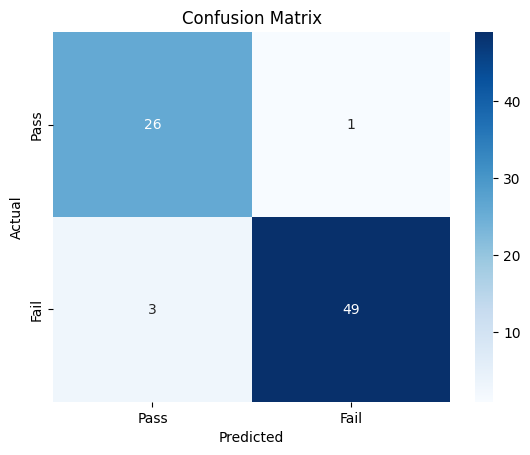

Accuracy:0.95
Precision:0.98
Recall:0.94


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
#Load the dataset
df=pd.read_csv('/content/student-mat.csv',sep=';')
#Create binary target 1=pass 0=Fail
df['Pass']=df['G3'].apply(lambda x:1 if x>=10 else 0)
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])
x=df.drop(columns=['G3','Pass'],axis=1)
y=df['Pass']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Pass',"Fail"],yticklabels=['Pass','Fail'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall:{recall:.2f}")
